In [13]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel("default.xlsx")
df.info()
#this shows the 30,000 observations each with 24 attributes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30001 entries, 0 to 30000
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30001 non-null  int64
 1   LIMIT_BAL                   30001 non-null  int64
 2   SEX                         30001 non-null  int64
 3   EDUCATION                   30001 non-null  int64
 4   MARRIAGE                    30001 non-null  int64
 5   AGE                         30001 non-null  int64
 6   PAY_0                       30001 non-null  int64
 7   PAY_2                       30001 non-null  int64
 8   PAY_3                       30001 non-null  int64
 9   PAY_4                       30001 non-null  int64
 10  PAY_5                       30001 non-null  int64
 11  PAY_6                       30001 non-null  int64
 12  BILL_AMT1                   30001 non-null  int64
 13  BILL_AMT2                   30001 non-null  int64
 14  BILL_A

In [3]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0


In [4]:
df.isnull().values.any()
#on first glance the dataset seems cleaned and fit for purpose in regards to data analysis due to the absence of missing
#values but upon further inspection this is not the case
#for example some of the columns aren't names cleanly/correctly e.g. pay_0 should be pay_1 and default payment, 
#can be simplified, the ID

False

In [5]:
#tidying up the actual dataset headers

df.rename(columns = {"PAY_0" : "PAY_1"}, inplace = True)
df.rename(columns = {"default payment next month" : "Default"}, inplace = True)

In [6]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0


In [7]:
#getting rid of ID column and first row as they aren't needed and clog up the dataset 
df.drop("ID", axis = 1, inplace = True)
updated_df = (df.drop(df.index[0]))
df = updated_df
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [8]:
df['SEX'].value_counts()
#this data is okay and doesn't need any manipulation

2    18112
1    11888
Name: SEX, dtype: int64

In [9]:
df['Default'].value_counts()
#this data is also okay and doesnt need any manipulation

0    23364
1     6636
Name: Default, dtype: int64

In [10]:
df['MARRIAGE'].value_counts()
#here we are needing to deal with the presence of the 0 as it is not listed in the description of the dataset

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

In [11]:
df['EDUCATION'].value_counts()
#here we are needing to deal with the presence of the 0's, 5's and 6's as they are not listed in the datasets description

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

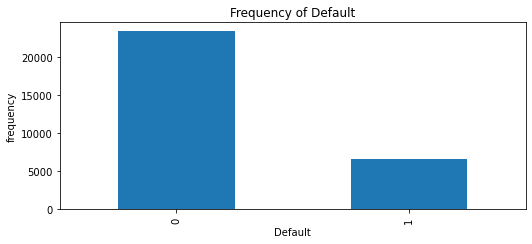

In [14]:
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

fig, ax = plt.subplots()
df['Default'].value_counts().plot(ax=ax, kind='bar', xlabel='Default', ylabel='frequency', title= 'Frequency of Default')
plt.show()
#Larger proportion of not default than default which is to be expected and a good balance so we wont need to take
#a subset to find significant correlations in the dataset
#0 == Not Default
#1 == Default 

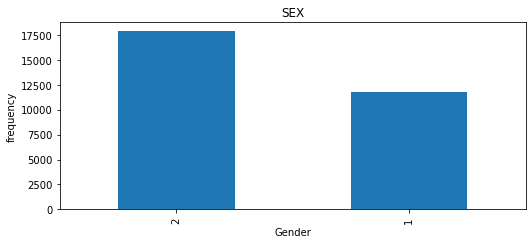

In [18]:
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

fig, ax = plt.subplots()
df['SEX'].value_counts().plot(ax=ax, kind='bar', xlabel='Gender', ylabel='frequency', title= 'SEX')
plt.show()
#there are significantly more women in the dataset than men
#1 == Male
#2 == Female

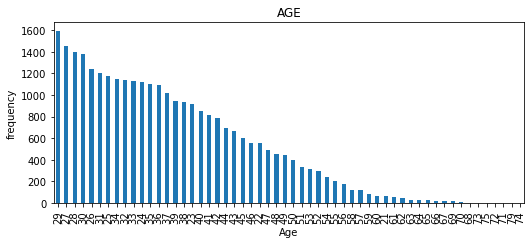

In [19]:
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

fig, ax = plt.subplots()
df['AGE'].value_counts().plot(ax=ax, kind='bar', xlabel='Age', ylabel='frequency', title= 'AGE')
plt.show()
#wide range of ages with the mode being 29 with ages 25-34 most represented 

In [17]:
#in the case of our dataset, we need to deal with the anomalous values i.e. 
#MARRIAGE : 0 values (54)
#EDUCATION 0, 5 and 6 values (14, 280, 51 respectively)
#in total these come to 399 indivudal pieces of data which is an insiginificant amount in the wider context of the dataset
#therefore they can simply be deleted 
df.drop(df[df['MARRIAGE'] == 0].index, inplace = True)
df.drop(df[df['EDUCATION'] == 0].index, inplace = True)
df.drop(df[df['EDUCATION'] == 5].index, inplace = True)
df.drop(df[df['EDUCATION'] == 6].index, inplace = True)
df.LIMIT_BAL.describe()

count      29601.000000
mean      167550.544914
std       129944.020953
min        10000.000000
25%        50000.000000
50%       140000.000000
75%       240000.000000
max      1000000.000000
Name: LIMIT_BAL, dtype: float64

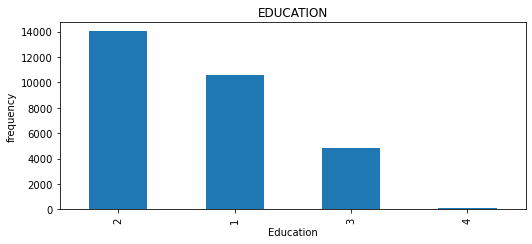

In [21]:
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

fig, ax = plt.subplots()
df['EDUCATION'].value_counts().plot(ax=ax, kind='bar', xlabel='Education', ylabel='frequency', title= 'EDUCATION')
plt.show()
#1 == Graduate School
#2 == University
#3 == High School
#4 == Others

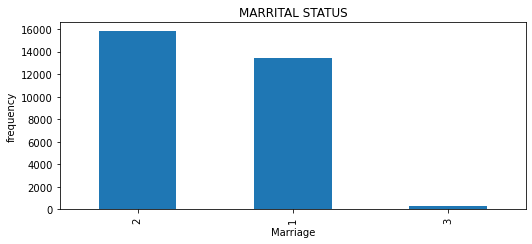

In [23]:
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

fig, ax = plt.subplots()
df['MARRIAGE'].value_counts().plot(ax=ax, kind='bar', xlabel='Marriage', ylabel='frequency', title= 'MARRITAL STATUS')
plt.show()
#1 == married
#2 == single
#3 == other

In [25]:
#when closely analysing the data in PAY_1 -> PAY_6 the datasets description tells us the values range from -1 to 9 
#where -1 is pay duly (they pay on time) and -1 meaning 1 month late, 2 meaning 2 months late etc, until 9
#which means 9 months or above
#HOWEVER when analysing the data closely we can see that the range of values is -2 to 8 which insinuates a scaling error
df[['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']].describe()

,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
count,29601.000000,29601.000000,29601.000000,29601.000000,29601.000000,29601.000000
mean,-0.014932,-0.131313,-0.163440,-0.218303,-0.263978,-0.287558
std,1.124503,1.199642,1.199793,1.172220,1.136217,1.152206
min,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000
25%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000


In [26]:
#Therefore to ammend this, we can add one to each of the PAY_X columns 
df['PAY_1'] = df['PAY_1'] + 1
df['PAY_2'] = df['PAY_2'] + 1
df['PAY_3'] = df['PAY_3'] + 1
df['PAY_4'] = df['PAY_4'] + 1
df['PAY_5'] = df['PAY_5'] + 1
df['PAY_6'] = df['PAY_6'] + 1

df.PAY_1.value_counts()
#however using PAY_1 as an example to see the output we see that we still have a value of 0, which is undocummented

 1    14499
 0     5633
 2     3662
-1     2708
 3     2640
 4      320
 5       76
 6       24
 9       19
 7       11
 8        9
Name: PAY_1, dtype: int64

In [28]:
#therefore to deal with this, we will group 0 and -1 as a value of 0 insinuates an ontime payment 
#we will be using a numpy function np.where() to achieve this 
#therefore when combining the values of 0 and -1 we should have 8341 instances where the individual paid on time when using
#PAY_1 as an example 
import numpy as np
df['PAY_1'] = np.where(df['PAY_1'] == 0, -1, df['PAY_1'])
df['PAY_2'] = np.where(df['PAY_2'] == 0, -1, df['PAY_2'])
df['PAY_3'] = np.where(df['PAY_3'] == 0, -1, df['PAY_3'])
df['PAY_4'] = np.where(df['PAY_4'] == 0, -1, df['PAY_4'])
df['PAY_5'] = np.where(df['PAY_5'] == 0, -1, df['PAY_5'])
df['PAY_6'] = np.where(df['PAY_6'] == 0, -1, df['PAY_6'])
df.PAY_1.value_counts()

 1    14499
-1     8341
 2     3662
 3     2640
 4      320
 5       76
 6       24
 9       19
 7       11
 8        9
Name: PAY_1, dtype: int64

In [29]:
df.LIMIT_BAL.describe()
#Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her 
#family (supplementary) credit.

count      29601.000000
mean      167550.544914
std       129944.020953
min        10000.000000
25%        50000.000000
50%       140000.000000
75%       240000.000000
max      1000000.000000
Name: LIMIT_BAL, dtype: float64